<a href="https://colab.research.google.com/github/Manas2001Agarwal/DATA_SCIENCE_PROJECTS_PORTFOLIO/blob/main/Ensembling/Fetal_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/fetal_health.csv")

Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal

Suspect

Pathological

To get this dataset :- https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [ ]:
data.shape

(2126, 22)

In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
data['fetal_movement'].unique()

array([0.   , 0.072, 0.222, 0.408, 0.38 , 0.441, 0.383, 0.451, 0.469,
       0.34 , 0.425, 0.334, 0.135, 0.099, 0.108, 0.112, 0.089, 0.103,
       0.085, 0.109, 0.079, 0.065, 0.055, 0.058, 0.047, 0.038, 0.012,
       0.018, 0.02 , 0.005, 0.003, 0.006, 0.001, 0.004, 0.009, 0.01 ,
       0.002, 0.008, 0.007, 0.028, 0.026, 0.107, 0.013, 0.016, 0.029,
       0.05 , 0.053, 0.011, 0.015, 0.022, 0.021, 0.017, 0.019, 0.025,
       0.014, 0.024, 0.023, 0.035, 0.054, 0.03 , 0.048, 0.088, 0.043,
       0.052, 0.091, 0.033, 0.092, 0.084, 0.115, 0.041, 0.04 , 0.027,
       0.031, 0.063, 0.06 , 0.071, 0.306, 0.298, 0.139, 0.189, 0.157,
       0.235, 0.36 , 0.455, 0.443, 0.47 , 0.477, 0.446, 0.481, 0.369,
       0.335, 0.43 , 0.346, 0.323, 0.375, 0.353, 0.045, 0.032, 0.051,
       0.036, 0.037, 0.049])

In [ ]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

We can see that this dataset is already preprocessed for use on machine learning algorithm

In [ ]:
len(data.columns)

22

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['fetal_health'], axis=1),
    data['fetal_health'],
    test_size=0.33,
    random_state=32)

**FEATURE_SELECTION**

**The dataset has 22 number of total features. For classification I intend to select only top 12 features**

In [ ]:
X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1806,143.0,0.000,0.0,0.001,0.000,0.0,0.0,68.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,144.0,144.0,146.0,1.0,0.0
1303,137.0,0.005,0.0,0.005,0.002,0.0,0.0,36.0,0.9,0.0,...,63.0,115.0,178.0,4.0,0.0,148.0,148.0,149.0,9.0,0.0
1533,136.0,0.001,0.0,0.007,0.000,0.0,0.0,42.0,0.8,9.0,...,45.0,117.0,162.0,2.0,0.0,139.0,138.0,140.0,2.0,0.0
1109,122.0,0.003,0.0,0.004,0.000,0.0,0.0,21.0,2.0,0.0,...,49.0,107.0,156.0,3.0,0.0,126.0,125.0,126.0,5.0,0.0
707,130.0,0.001,0.0,0.008,0.000,0.0,0.0,54.0,0.6,6.0,...,30.0,116.0,146.0,2.0,0.0,133.0,133.0,134.0,1.0,0.0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.11940572, 0.1457964 , 0.05964268, 0.07459946, 0.02533074,
       0.        , 0.07488298, 0.20847502, 0.21589817, 0.20228969,
       0.07889304, 0.13020217, 0.12138907, 0.06480576, 0.01546862,
       0.00383732, 0.14108006, 0.16994074, 0.13681446, 0.15853161,
       0.03872056])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

mean_value_of_short_term_variability                      0.215898
abnormal_short_term_variability                           0.208475
percentage_of_time_with_abnormal_long_term_variability    0.202290
histogram_mean                                            0.169941
histogram_variance                                        0.158532
accelerations                                             0.145796
histogram_mode                                            0.141080
histogram_median                                          0.136814
histogram_width                                           0.130202
histogram_min                                             0.121389
baseline value                                            0.119406
mean_value_of_long_term_variability                       0.078893
prolongued_decelerations                                  0.074883
uterine_contractions                                      0.074599
histogram_max                                             0.06

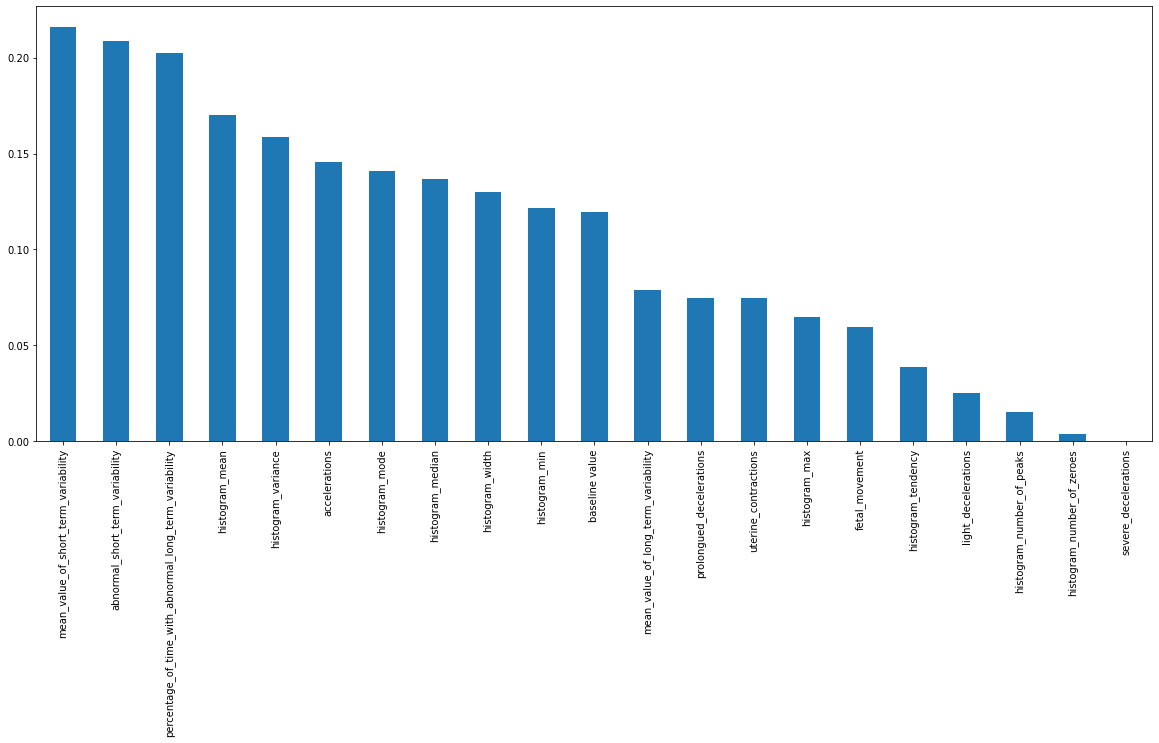

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
#No we Will select the  top 12 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=12)
sel_five_cols.fit(X_train, y_train)
columns_select = X_train.columns[sel_five_cols.get_support()]
print(columns_select)

Index(['baseline value', 'accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_min', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance'],
      dtype='object')


In [ ]:
X_train[columns_select]

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_width,histogram_min,histogram_mode,histogram_mean,histogram_median,histogram_variance
1806,143.0,0.000,0.000,68.0,0.3,6.0,27.0,132.0,144.0,144.0,146.0,1.0
1303,137.0,0.005,0.000,36.0,0.9,0.0,63.0,115.0,148.0,148.0,149.0,9.0
1533,136.0,0.001,0.000,42.0,0.8,9.0,45.0,117.0,139.0,138.0,140.0,2.0
1109,122.0,0.003,0.000,21.0,2.0,0.0,49.0,107.0,126.0,125.0,126.0,5.0
707,130.0,0.001,0.000,54.0,0.6,6.0,30.0,116.0,133.0,133.0,134.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
997,129.0,0.007,0.000,23.0,1.5,0.0,44.0,115.0,133.0,139.0,141.0,11.0
510,154.0,0.006,0.000,48.0,0.7,0.0,66.0,123.0,161.0,164.0,164.0,8.0
252,130.0,0.002,0.000,57.0,0.6,26.0,91.0,65.0,129.0,131.0,133.0,10.0
1334,128.0,0.003,0.003,14.0,2.7,0.0,89.0,67.0,115.0,115.0,116.0,44.0


In [ ]:
X_train = X_train[columns_select]
X_test = X_test[columns_select]

**BUILDING_MODEL,Training and CALCULATING ACCURACY**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc, log_loss, recall_score, ConfusionMatrixDisplay 
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("accuracy")
print(accuracy_score(y_test,y_pred))

print(" ")
print("classification report")
print(classification_report(y_test,y_pred))
print(" ")
cm = confusion_matrix(y_test,y_pred,normalize = 'true')
print(cm)

accuracy
0.9230769230769231
 
classification report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       557
         2.0       0.72      0.77      0.74        83
         3.0       0.94      0.82      0.88        62

    accuracy                           0.92       702
   macro avg       0.87      0.85      0.86       702
weighted avg       0.92      0.92      0.92       702

 
[[0.95691203 0.03949731 0.00359066]
 [0.21686747 0.77108434 0.01204819]
 [0.12903226 0.0483871  0.82258065]]


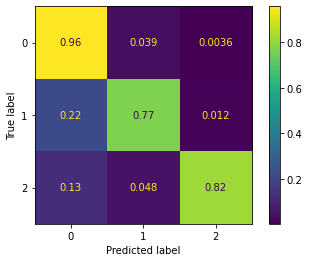

<Figure size 864x504 with 0 Axes>

In [ ]:
dsp = ConfusionMatrixDisplay(cm)
dsp.plot()
plt.figure(figsize=(12,7))
plt.show()

**TREE_PLOT**

[Text(0.41636244158878505, 0.9615384615384616, 'X[4] <= 0.55\ngini = 0.377\nsamples = 1424\nvalue = [1098, 212, 114]'),
 Text(0.22188960280373832, 0.8846153846153846, 'X[5] <= 68.5\ngini = 0.597\nsamples = 270\nvalue = [72, 147, 51]'),
 Text(0.15727219626168223, 0.8076923076923077, 'X[3] <= 58.5\ngini = 0.521\nsamples = 237\nvalue = [70, 147, 20]'),
 Text(0.056074766355140186, 0.7307692307692307, 'X[5] <= 61.0\ngini = 0.283\nsamples = 41\nvalue = [34, 7, 0]'),
 Text(0.04672897196261682, 0.6538461538461539, 'X[9] <= 167.0\ngini = 0.224\nsamples = 39\nvalue = [34, 5, 0]'),
 Text(0.037383177570093455, 0.5769230769230769, 'X[7] <= 135.5\ngini = 0.188\nsamples = 38\nvalue = [34, 4, 0]'),
 Text(0.018691588785046728, 0.5, 'X[11] <= 6.5\ngini = 0.071\nsamples = 27\nvalue = [26, 1, 0]'),
 Text(0.009345794392523364, 0.4230769230769231, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]'),
 Text(0.028037383177570093, 0.4230769230769231, 'X[5] <= 12.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Tex

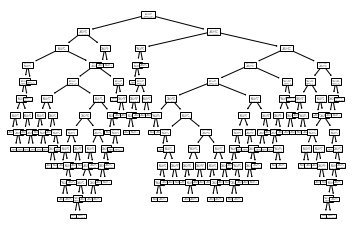

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.columns
clf.classes_

array([1., 2., 3.])

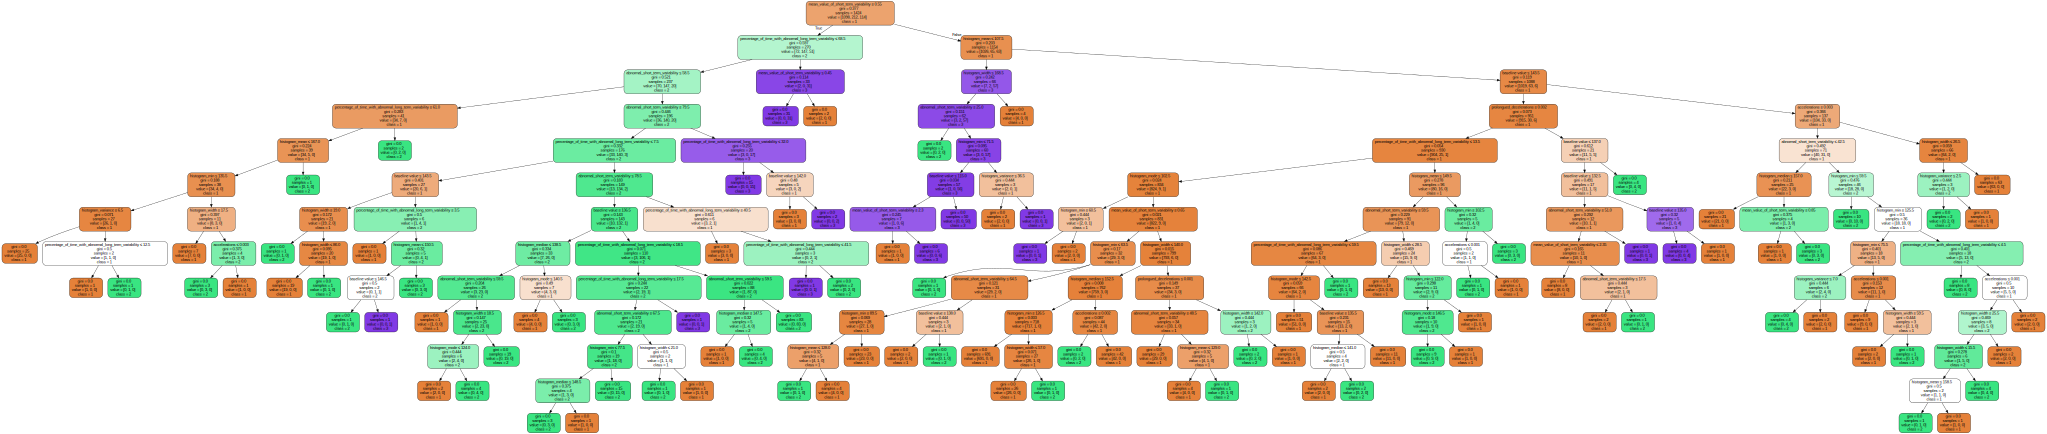

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names= X_train.columns,
                    class_names= ['1','2','3'],  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
graph.render("feta_classification")

'feta_classification.pdf'

In [ ]:
from sklearn.tree import export_text
feature_names = ['baseline value', 'accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_min', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']
r = export_text(clf,feature_names = feature_names)
print(r)

|--- mean_value_of_short_term_variability <= 0.55
|   |--- percentage_of_time_with_abnormal_long_term_variability <= 68.50
|   |   |--- abnormal_short_term_variability <= 58.50
|   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 61.00
|   |   |   |   |--- histogram_mean <= 167.00
|   |   |   |   |   |--- histogram_min <= 135.50
|   |   |   |   |   |   |--- histogram_variance <= 6.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- histogram_variance >  6.50
|   |   |   |   |   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 12.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- percentage_of_time_with_abnormal_long_term_variability >  12.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- histogram_min >  135.50
|   |   |   |   |   |   |--- histogram_width <= 17.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- histogram_width >  17.50


**CROSS_VALIDATION and HYPERPARAMETER TUNING**


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, StratifiedShuffleSplit, RandomizedSearchCV

In [ ]:
cv = StratifiedKFold(n_splits=5,random_state = 55,shuffle = True)
model_cv = cross_validate(clf,X_train,y_train,cv=cv,verbose = 2,return_train_score = True)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [ ]:
for x in model_cv.keys():
  model_cv[x] = model_cv[x].mean()

In [ ]:
for x in model_cv.keys():
  print(x, " : ", model_cv[x])

fit_time  :  0.020966339111328124
score_time  :  0.003781700134277344
test_score  :  0.9199530516431926
train_score  :  1.0


In [ ]:
param_dist = {"max_depth": [3,4,5,6,7,8],
              "max_features": [i for i in range(1,10)],
              "min_samples_leaf": [i for i in range(1,10)],
              "criterion": ["gini", "entropy"]}

In [ ]:
tree_cv = RandomizedSearchCV(clf, param_dist, cv=5,n_iter = 10)

In [ ]:
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 8, 'criterion': 'entropy'}


In [ ]:
print(accuracy_score(y_test,tree_cv.predict(X_test)))

0.9216524216524217
